In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
evts = pd.read_csv("data/events.csv", dtype = {"event_id": np.int16, "application_id": np.int16}, usecols = ["date", "application_id", "attributed", "connection_type", "device_language"])
inst = pd.read_csv("data/installs.csv", dtype = {"application_id": np.int16, "click_hash": np.float16})
#clks = pd.read_csv("data/clicks.csv.gzip", dtype = {"advertiser_id": np.int8, "action_id": np.float16, "source_id": np.int8, "wifi_connection": bool, "carrier_id": np.float16, "brand": np.float16, "touchX": np.float16, "touchY": np.float16})

/home/sol/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Intento encontrar algo entre los events y las instalaciones

In [3]:
evts.columns

Index(['date', 'application_id', 'attributed', 'connection_type',
       'device_language'],
      dtype='object')

In [4]:
inst.columns

Index(['created', 'application_id', 'ref_type', 'ref_hash', 'click_hash',
       'attributed', 'implicit', 'device_countrycode', 'device_brand',
       'device_model', 'session_user_agent', 'user_agent', 'event_uuid',
       'kind', 'wifi', 'trans_id', 'ip_address', 'device_language'],
      dtype='object')

## Veo como se comportan los eventos según su tipo de conexión

In [5]:
#Catidad de eventos según el tipo de conexión
conexiones = evts['connection_type'].value_counts() 
conexiones

Cable/DSL    331948
Cellular     280511
Corporate         4
Name: connection_type, dtype: int64

Text(0.5, 0, 'Tipo de conexión')

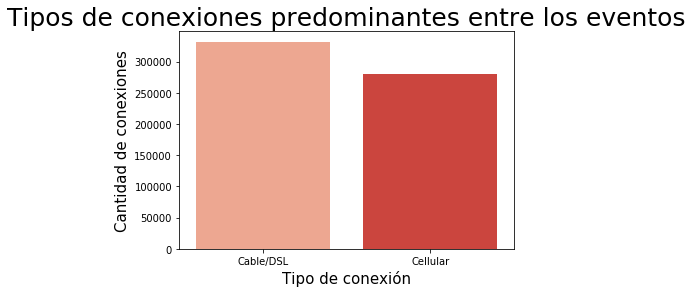

In [6]:
#Como el tipo Corporate tiene tan solo 4 apariciones y los otros más de 2 millones,
#sucede que tiene un valor despreciable frente a los otros dos, 
#por lo que podría solo tomar en cuenta los tipos de conexión predominantes.
conexiones = conexiones.drop(labels = ['Corporate'], axis = 0)
grf2 = sns.barplot(x = conexiones.index, y = conexiones.values, orient = 'v', palette = 'Reds') 
grf2.set_title("Tipos de conexiones predominantes entre los eventos", fontsize = 25)
grf2.set_ylabel("Cantidad de conexiones", fontsize = 15)
grf2.set_xlabel("Tipo de conexión", fontsize = 15)


## ¿Qué hay entre el campo "application_id" del set "events" y el set "installs"?

In [7]:
apps_populares_evts = evts["application_id"].value_counts().nlargest(10)
apps_populares_evts

66     325696
64     259084
145    252431
63     181555
103    137513
57     134498
121    123711
212    108489
113     82962
39      76448
Name: application_id, dtype: int64

Text(0.5, 0, 'Cantidad de eventos')

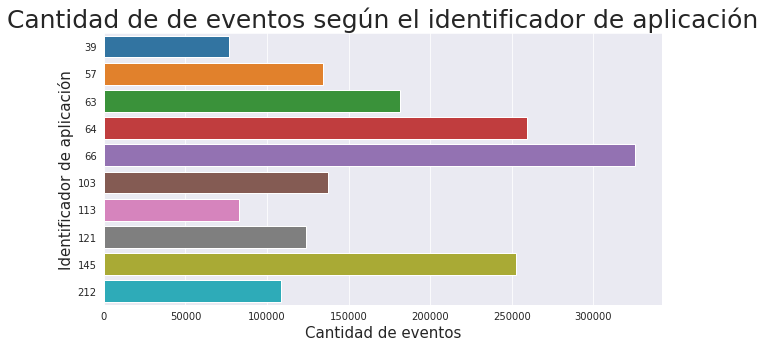

In [8]:
plt.figure(figsize=(10,5)) 
sns.set_style('darkgrid') 
grf3 = sns.barplot(x = apps_populares_evts.values, y = apps_populares_evts.index, orient = 'h') 
grf3.set_title("Cantidad de de eventos según el identificador de aplicación", fontsize = 25) 
grf3.set_ylabel("Identificador de aplicación", fontsize = 15) 
grf3.set_xlabel("Cantidad de eventos", fontsize = 15)

In [9]:
apps_populares_inst = inst["application_id"].value_counts().nlargest(10)
apps_populares_inst

7     947
9     731
10    389
16    362
8     328
2     174
29     97
20     95
6      35
1      34
Name: application_id, dtype: int64

Text(0.5, 0, 'Cantidad de instalaciones')

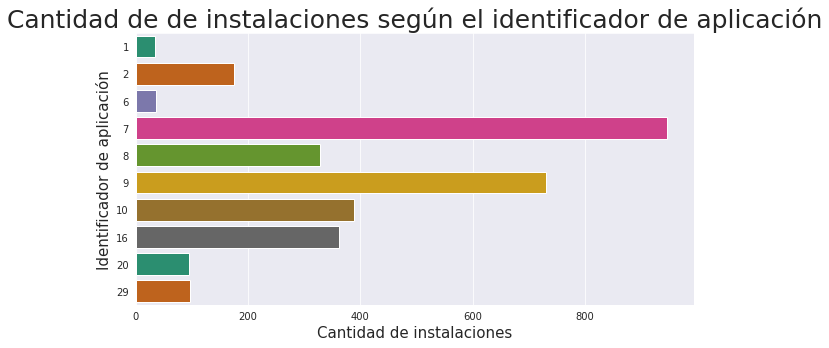

In [10]:
plt.figure(figsize=(10,5)) 
sns.set_style('darkgrid') 
grf3 = sns.barplot(x = apps_populares_inst.values, y = apps_populares_inst.index, orient = 'h', palette = 'Dark2') 
grf3.set_title("Cantidad de de instalaciones según el identificador de aplicación", fontsize = 25) 
grf3.set_ylabel("Identificador de aplicación", fontsize = 15) 
grf3.set_xlabel("Cantidad de instalaciones", fontsize = 15)

## Vemos que sucede con los eventos y las instalaciones atribuidas a Jammp


In [11]:
#Eventos atribuidos a jummp 
eventos_atrib_app = evts['attributed'].value_counts()
eventos_atrib_app

False    2489324
True        5099
Name: attributed, dtype: int64

Notamos que del total de eventos son muy pocos los atribuidos a Jammp.

Veamos ahora que encontramos en las instalaciones.

In [12]:
#instalaciones atribuidas a Jammp
inst['attributed'].value_counts()

False    3412
Name: attributed, dtype: int64

In [13]:
inst['created'].head()

0    2019-03-13 01:43:33.445
1    2019-03-13 04:58:35.078
2    2019-03-13 04:20:57.666
3    2019-03-13 04:20:57.698
4    2019-03-10 22:24:56.684
Name: created, dtype: object

De las instalaciones directamente ninguna es atribuida a Jammp.


## Analizamos qué se puede deducir del campo device_language

In [14]:
inst_red = inst.loc[:, ["created", "application_id", "device_language"]]
inst_red.memory_usage(deep = True).sum()

307160

In [20]:
evts_red = evts.loc[:, [ "application_id", "device_language"]].dropna()
evts_red.size

4813208

In [21]:
evts_inst = pd.merge(evts_red, inst_red, on = "application_id")

In [22]:
evts_inst.count()

application_id       97359013
device_language_x    97359013
created              97359013
device_language_y    97357874
dtype: int64

In [24]:
grouped = evts_inst.groupby(['application_id', 'device_language_x', 'device_language_y']). agg({'device_language_x': 'count', 'device_language_y': 'count'})

MemoryError: 